# Preprocessing: Charlotte Edition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## load data

In [2]:
df_ori = pd.read_csv('../data/rawdata/labeled_data.csv')

# classes:
#     hate speech = 0
#     offensive   = 1
#     neither     = 2

df_ori.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df = df_ori.drop(
    labels=[
        'Unnamed: 0',
        'count',
        'offensive_language',
        'hate_speech',
        'neither'
    ],
    axis=1
)

# drop offensive language samples
df = df[df['class'] != 1]

# change classes to:
#     not hate speech = 0
#     hate speech     = 1

df['class'] = df['class'].replace(0, 1).replace(2, 0)
df = df.reset_index(drop=True).rename({'tweet' : 'text'}, axis=1)

df

,class,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,""" momma said no pussy cats inside my doghouse """
2,0,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
3,0,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
4,0,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
...,...,...
5588,0,"you know what they say, the early bird gets th..."
5589,1,you're all niggers
5590,1,you're such a retard i hope you get type 2 dia...
5591,0,"you've gone and broke the wrong heart baby, an..."


## normalize

In [4]:
# look at some samples
for i in range(50):
    print(
        'class =',
        df.iat[i, 0],
        '\n',
        repr(df.iat[i, 1]),
        end='\n\n'
    )

class = 0 
 "!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

class = 0 
 '" momma said no pussy cats inside my doghouse "'

class = 0 
 '"@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF" woof woof hot scally lad'

class = 0 
 '"@AllAboutManFeet: http://t.co/3gzUpfuMev" woof woof and hot soles'

class = 0 
 '"@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes." One oreo? Lol'

class = 0 
 '"@ArizonasFinest6: Why the eggplant emoji doe?"y he say she looked like scream lmao'

class = 0 
 '"@BabyAnimalPics: baby monkey bathtime http://t.co/7KPWAdLF0R"\nAwwwwe! This is soooo ADORABLE!'

class = 1 
 '"@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer" gaywad'

class = 1 
 '"@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican'

class = 1 
 '"@DevilGrimz: @VigxRArts you\'re fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xU

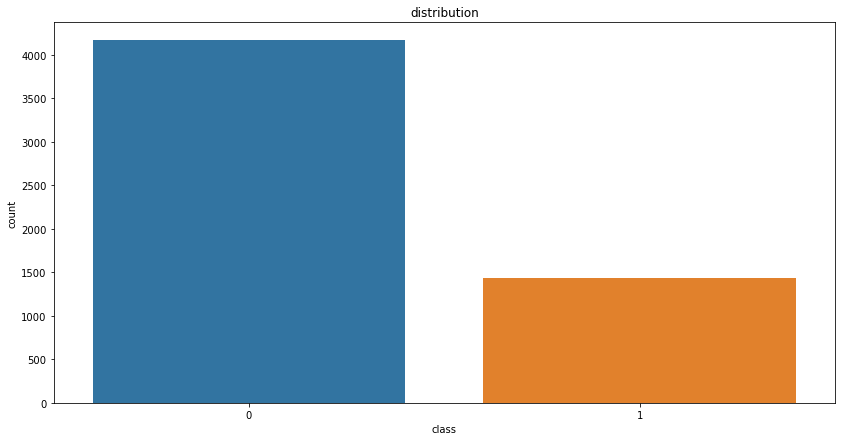

In [5]:
fig = plt.figure(figsize=(14,7))
plt.title('distribution')
graph = sns.countplot(x='class', data=df)
for category in graph.patches:
    height = category.get_height()

### clean()

In [6]:
from wordcloud import WordCloud
import re
import html

SymSpell doesn't work very well

```py
import pkg_resources
from symspellpy import SymSpell

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    'symspellpy', 'frequency_dictionary_en_82_765.txt')
bigram_path = pkg_resources.resource_filename(
    'symspellpy', 'frequency_bigramdictionary_en_243_342.txt')
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
```

In [7]:
def clean(text: str) -> str:
    '''Normalizes a text sample'''

    # todo: deal with numbers, translate abbreviations
    
    # twitter specific: remove RT CC ^!
    text = re.sub(r'(RT[:\s])|(CC[:\s])|(^!+)', r'', text)
    
    # unescape html
    text = html.unescape(text)
    # remove mentions
    text = re.sub(r'(^|.)@[^\s]*', r'', text)
    # remove urls
    text = re.sub(r'https?:\/\/[^\s]*', r'', text)
    # remove unwanted characters
    text = re.sub(r"[^\w\s\d']+", r' ', text)
    # remove repeated special characters
    text = re.sub(r"(['])[']+", r'\1', text)
    # remove extra spaces
    text = re.sub(r'\s{2,}', r' ', text)
    
    # text = sym_spell.lookup_compound(
    #    text, max_edit_distance=2)[0].term
    
    return text

### apply to data

In [8]:
df_c = df.copy()
df_c['text'] = df['text'].apply(clean)

for i in range(10):
    print(df.iat[i, 1], '\n', df_c.iat[i, 1], end='\n\n')

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 
  As a woman you shouldn't complain about cleaning up your house as a man you should always take the trash out 

" momma said no pussy cats inside my doghouse " 
  momma said no pussy cats inside my doghouse 

"@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF" woof woof hot scally lad 
  SimplyAddictedToGuys woof woof hot scally lad

"@AllAboutManFeet: http://t.co/3gzUpfuMev" woof woof and hot soles 
  woof woof and hot soles

"@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes." One oreo? Lol 
  Lemmie eat a Oreo do these dishes One oreo Lol

"@ArizonasFinest6: Why the eggplant emoji doe?"y he say she looked like scream lmao 
  Why the eggplant emoji doe y he say she looked like scream lmao

"@BabyAnimalPics: baby monkey bathtime http://t.co/7KPWAdLF0R"
Awwwwe! This is soooo ADORABLE! 
  baby monkey bathtime Awwwwe This is soooo AD

### save to csv

In [9]:
df_c.to_csv('../data/cleandata/twitter-c.csv')

# Isita suggested dataset splitting

In [10]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train_, X_test, y_train_, y_test = train_test_split(
    df_c.index.values,
    df_c['class'],
    test_size=0.10,
    random_state=42,
    stratify=df_c['class'],    
)

X_test = df_c['text'].iloc[X_test]
y_test = df_c['class'].iloc[y_test]

# split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    df_c['text'].iloc[X_train_],
    df_c['class'].iloc[y_train_],
    test_size=0.10,
    random_state=42,
    stratify=df_c['class'].iloc[y_train_],  
)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(4529,) (504,) (560,)
(4529,) (504,) (560,)
